<a href="https://colab.research.google.com/github/SDRIYAZ/machine-learning/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ordinal Encoding
Advantages:
*   Keeps the semantical information of the variable(human readble content)
*   straightforward<br>
  Disadvantages:<br>
*  it does not add any ML valuable information

In [ ]:
import pandas as pd
import datetime

In [ ]:
df_base=datetime.datetime.today()
df_data_list=[df_base -datetime.timedelta(days=x) for x in range(0,20)]
df=pd.DataFrame(df_data_list)
df.columns=['day']
df

,day
0,2021-06-06 14:24:16.273728
1,2021-06-05 14:24:16.273728
2,2021-06-04 14:24:16.273728
3,2021-06-03 14:24:16.273728
4,2021-06-02 14:24:16.273728
5,2021-06-01 14:24:16.273728
6,2021-05-31 14:24:16.273728
7,2021-05-30 14:24:16.273728
8,2021-05-29 14:24:16.273728
9,2021-05-28 14:24:16.273728


In [ ]:
help(datetime)

Help on module datetime:

NAME
    datetime - Fast implementation of the datetime type.

MODULE REFERENCE
    https://docs.python.org/3.7/library/datetime
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

CLASSES
    builtins.object
        date
            datetime
        time
        timedelta
        tzinfo
            timezone
    
    class date(builtins.object)
     |  date(year, month, day) --> date object
     |  
     |  Methods defined here:
     |  
     |  __add__(self, value, /)
     |      Return self+value.
     |  
     |  __eq__(self, value, /)
     |      Return self==value.
     |  
     |  __format__(...)
     |      Formats self with strftime.
     |  
     |  __ge__(self, value, /)
     |    

In [ ]:
 df['day_of_week']=df['day'].dt.day_name() 
 df.head()

,day,day_of_week
0,2021-06-06 14:24:16.273728,Sunday
1,2021-06-05 14:24:16.273728,Saturday
2,2021-06-04 14:24:16.273728,Friday
3,2021-06-03 14:24:16.273728,Thursday
4,2021-06-02 14:24:16.273728,Wednesday


In [ ]:
workday_map=   {'Monday':1,
             'Tuesday':2,
             'Wednesday':3,
             'Thursday':4,
             'Friday':5,
             'Saturday':6,
             'Sunday':7 }
df['day_ordinal']=df.day_of_week.map(workday_map)
df.head(20)


,day,day_of_week,day_ordinal
0,2021-06-06 14:24:16.273728,Sunday,7
1,2021-06-05 14:24:16.273728,Saturday,6
2,2021-06-04 14:24:16.273728,Friday,5
3,2021-06-03 14:24:16.273728,Thursday,4
4,2021-06-02 14:24:16.273728,Wednesday,3
5,2021-06-01 14:24:16.273728,Tuesday,2
6,2021-05-31 14:24:16.273728,Monday,1
7,2021-05-30 14:24:16.273728,Sunday,7
8,2021-05-29 14:24:16.273728,Saturday,6
9,2021-05-28 14:24:16.273728,Friday,5


#Missing Values - Feature Engineering

##Types

#####1.MCAR   Missing  Completely At Randomly<br>
* in this absolutely there is no  relation between data  missing and any other values<br> 

In [ ]:
import pandas as pd
data=pd.read_csv("titanic.csv")


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


####2.MNAR
Missing Data Not at Randomly<br>
* There is absolutely some relationship between the missing and another values<br>

In [ ]:
import numpy as np

data=pd.read_csv('titanic.csv')

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data['Cabin_null']=np.where(data['Cabin'].isnull(),1,0)
#in this where ever we are having null in cabin it is replaced by 1 otherwise 0 

In [ ]:
data['Cabin_null'].mean()

0.7710437710437711

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [ ]:
data['Cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin_null, Length: 891, dtype: int64

In [ ]:
data.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

####3.MAR
* Missing At Random<br>
 

All the techniques of handling missing values<br>
 * 1.mean/median/mode replacement<br> 
    
 When should we apply?
 Mean/Median imputation has the assumption that the data are missing completely that the data are missing completely(MCAR)<br>
   2.Random Sample Imputation<br>
   3.Capturing NAN Values with a new Feature<br>
   4.End of Distribution Imputation<br>
   5.Arbitary imputation<br>
   6.Frequent categories impuutation<br>

####1.Mean/Median/Mode Replacement

In [ ]:
data=pd.read_csv('titanic.csv',usecols=['Survived','Age','Fare',])

In [ ]:
data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
def impute_nan(data,variable,median):
  data[variable+"_median"]=data[variable].fillna(median)
   #Here we are creating  a new feature/column where we are replacing the nan values with median

In [ ]:
median=data.Age.median()
median

28.0

In [ ]:
impute_nan(data,'Age',median) #we are calling the fuction 
data.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [ ]:
print(data['Age'].std())  #checking the standard deviation
print(data['Age_median'].std())

14.526497332334044
13.019696550973194


In [ ]:
import matplotlib.pyplot as plt


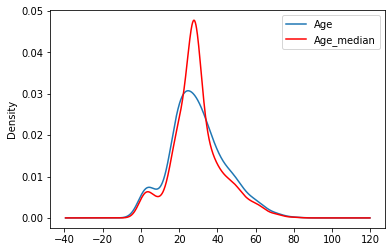

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) 
data['Age'].plot(kind='kde', ax=ax)  #kde=kurnel density estimator
data.Age_median.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

#Advantages And Disadvantages of mean/median/mode
 * Advantages:<br>
   1.Easy to implement(Robust to outliers)<br>
   2.Faster way to obtain the complete dataset<br>
 * Disadvantages:<br>
  1.change in the original variance in the data<br>
  2.impact in correlation<br>

###2.Random Sample Imputation
* Aim: Random sample imputation consists of taking random observation from the dataset and we use this obseravation to replace the nan values
 * When should it be used?<br>
    It assumes that the data are missing completely at Random(MCAR)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('titanic.csv',usecols=['Age','Survived','Fare'])

In [ ]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
data.isnull().mean()    #Percentage of NAN values in dataset

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
data['Age'].isnull().sum()

177

In [ ]:
data['Age'].dropna().sample(data['Age'].isnull().sum(),random_state=0) 
 #In this all nan values are being replaced by some sampled value

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [ ]:
median=data.Age.median()
median

28.0

In [ ]:
def impute_nan(data,variable,median):
  data[variable+"_median"]=data[variable].fillna(median)
  data[variable+"_random"]=data[variable]
  ##It will have the random sample  to fill the nan
  random_sample=data[variable].dropna().sample(data['Age'].isnull().sum(),random_state=0) 
  #pandas need to have the same index in order to merge the datset
  random_sample.index=data[data[variable].isnull()].index
  data.loc[data[variable].isnull(),variable+'_random']=random_sample #Replacing nan values with some random values

In [ ]:
impute_nan(data,'Age',median)

In [ ]:
data.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


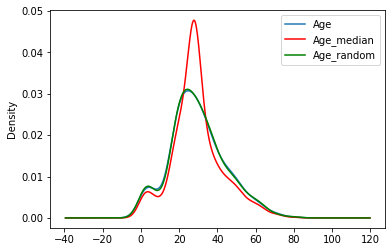

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) 
data['Age'].plot(kind='kde', ax=ax)  #kde=kurnel density estimator
data.Age_median.plot(kind='kde', ax=ax, color='red')
data.Age_random.plot(kind='kde', ax=ax, color='green') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [ ]:
print(data['Age'].std())
print(data['Age_random'].std())

14.526497332334044
14.5636540895687


####Advantages:<br>
1.Easy to implement<br>
2.There is no distortion in variance<br>
   Disadvantages:<br>
   1.Every situation randomness does not work


###3.Capturing NAN values with a new feature
It works well if the data are not missing completely at Random

In [ ]:
import pandas as pd
data=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
import numpy as np
data['Age_NAN']=np.where(data['Age'].isnull(),1,0)

In [ ]:
data.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [ ]:
data['Age'].median()

28.0

In [ ]:
data['Age'].fillna(data.Age.median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
data.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


###Advantages:
1.Easy to implement<br>
2.Captures the importance of missing values<br>
 Disadvantages:
 1.Creating Additional Features<br>
* for example:<br>
   we have 200 features  with nan values 200 additional features are being created so it would leads to Curse of Dimensionality


###4.End of Distribution Imputation
  It works well if the data are not missing completely at Random

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


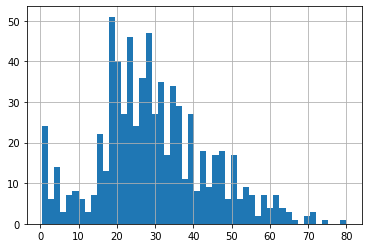

In [ ]:
data.Age.hist(bins=50)

In [ ]:
extreme=data['Age'].mean()+3*data.Age.std()   
#Outlier value which is picked after the 3rd standard deviation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


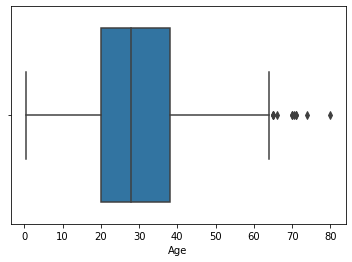

In [ ]:
import seaborn as sns
sns.boxplot('Age',data=data)

In [ ]:
def impute_nan(df,variable,median,extreme):
  data[variable+"_end_distribution"]=data[variable].fillna(extreme)
  data[variable].fillna(median,inplace=True) 
  #nan values in Age are replaced by median


In [ ]:
impute_nan(data,'Age',df.Age.median(),extreme)

In [ ]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


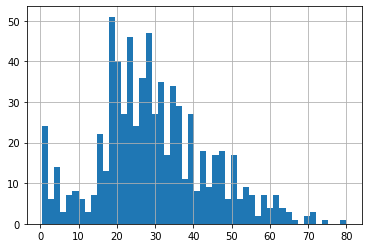

In [ ]:
data['Age'].hist(bins=50)

In [ ]:
data['Age_end_distribution'].hist(bins=50)

In [ ]:
sns.boxplot('Age_end_distribution',data=data)

##Advantages:
1.Easy to implement<br>
2.Captures the importance of missing if there is one<br>
3.Inorder to reduce the impact of the Outliers  we used this technique<br>
Disadvantages:<br>
1.Distorts the original distribution of the variable<br>
2.if missingness is not important ,it may mask the predictive power if the original variable by distorting its distibution<br>
3.if the number if NA is big,it will mask true outliers in the distribution<br>
4.if the number of NA is small,the replaced NA may be considered an outlier and pre-processed ina subsequient of feature engineering<br>



# Arbitrary Value imputation
 
   It consists of replacing NAN by an arbitrary value

In [ ]:
import pandas as pd 
import seaborn as sns 
import numpy as np
data=pd.read_csv('titanic.csv',usecols=['Age','Survived','Fare'])

In [ ]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
def impute_nan (data,variable):
    data[variable+'_zero']=data[variable].fillna(0)
    data[variable+'_hundred']=data[variable].fillna(100)
    

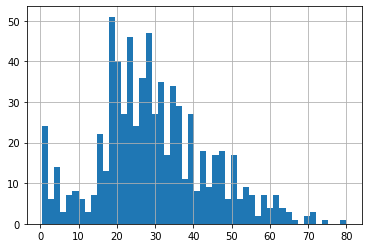

In [ ]:
data['Age'].hist(bins=50)

##Arbitrary Value:
 It should be more frequently present<br> 




   Advantages:<br>
   1.Easy to implement<br>
   2.Captures the importance of missingness if there is one<br>
   Disadvantages:<br>


   
   1.Distorts the original distribition of the varibales<br>
   2.if the missingness is not important,it may mask  predective power of the original variable by distorting its distribution<br>
   3.Hard to decide which value to use<br>

#Handling - Categorical  Missing Values
  TYPES of Techniques:<br>
  1.Frequent Category Imputation<br>
  2.Adding a variable to capture NAN<br>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
data=pd.read_csv('train.csv' ,usecols=['SalePrice','GarageType','FireplaceQu','BsmtQual'])


In [ ]:
data.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [ ]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [ ]:
data.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [ ]:
data.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [ ]:
data.shape

(1460, 4)

In [ ]:
#Computing the frequency with every feature
data['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

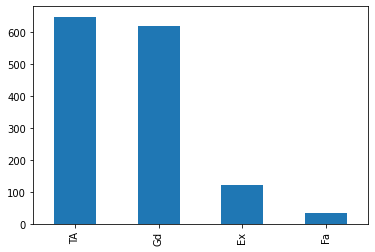

In [ ]:
data['BsmtQual'].value_counts().plot.bar()


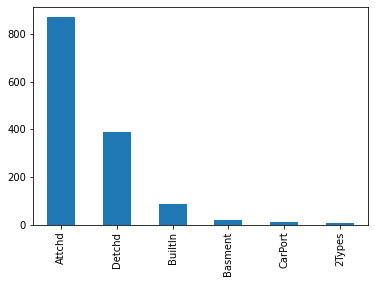

In [ ]:
data['GarageType'].value_counts().plot.bar()

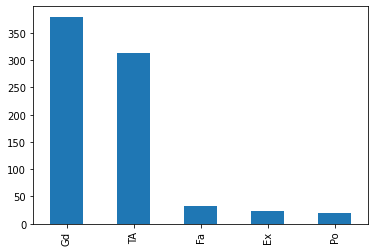

In [ ]:
data['FireplaceQu'].value_counts().plot.bar()

In [ ]:
data['FireplaceQu'].mode()[0]

'Gd'

In [ ]:
def impute_nan(data,variable):
  most_frequent_category=data[variable].mode()[0] 
  data[variable].fillna(most_frequent_category,inplace=True)

In [ ]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
  impute_nan(data,features)

In [ ]:
data.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

 ####Advantages:<br>
   1.Easy to implement<br>
   2.Faster  way to implement<br>

  Disadvantages:<br>
  1.since we are using most frrquent labels,it may use them in an over represented way<br>
  2.Distort the relationship of the most frequent category <br>
  3.if there is more number of missing values then it is not useful

## 2.Adding a variable to capture NAN<br>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
data=pd.read_csv('train.csv' ,usecols=['SalePrice','GarageType','FireplaceQu','BsmtQual'])
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
data['BsmtQual_var']=np.where(data['BsmtQual'].isnull(),1,0)

In [ ]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [ ]:
data['BsmtQual'].mode()[0]

'TA'

In [ ]:
frequent=data['BsmtQual'].mode()[0]

In [ ]:
data['BsmtQual'].fillna(frequent,inplace=True)

In [ ]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [ ]:
data.isnull().sum()

BsmtQual          0
FireplaceQu     690
GarageType       81
SalePrice         0
BsmtQual_var      0
dtype: int64

In [ ]:
data['FireplaceQu_var']=np.where(data['FireplaceQu'].isnull(),1,0)

In [ ]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,NaN,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [ ]:
frequent=data['FireplaceQu'].mode()[0]

In [ ]:
data['FireplaceQu'].fillna(frequent,inplace=True)

In [ ]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


### ### Suppose if we have more frequent categories,we just replace NAN with a new category

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
data=pd.read_csv('train.csv' ,usecols=['SalePrice','GarageType','FireplaceQu','BsmtQual'])
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
def impute_nan(data,variable):
  data[variable+"_newvar"]=np.where(data[variable].isnull(),"Missing",data[variable])

In [ ]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
  impute_nan(data,features)

In [ ]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [ ]:
data.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Missing,Attchd


###  Handle Categorical features

1.   One Hot Encoding
2.   



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('titanic.csv',usecols=['Gender'])
data.head()

,Gender
0,male
1,female
2,female
3,female
4,male


In [ ]:
pd.get_dummies(data).head()

,Gender_female,Gender_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
pd.get_dummies(data,drop_first=True).head()

,Gender_male
0,1
1,0
2,0
3,0
4,1


In [ ]:
data=pd.read_csv('titanic.csv',usecols=['Embarked'])

In [ ]:
data.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [ ]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
data.dropna(inplace=True)

In [ ]:
pd.get_dummies(data,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


## In Dummy variables we can drop 1 column 
  ex: categories=3, then columns=categories-1

  Disadvantages:
  1.it is not useful for categories<br>
  2.it leads to curse of dimensionality<br>


##    One Hot Encoding with many categories in a Feature

In [ ]:
import pandas as pd
data=pd.read_csv('train.csv.zip',usecols=['X0','X1','X3','X4','X5','X6'])

In [ ]:
data.head()

,X0,X1,X3,X4,X5,X6
0,k,v,a,d,u,j
1,k,t,e,d,y,l
2,az,w,c,d,x,j
3,az,t,f,d,x,l
4,az,v,f,d,h,d


In [ ]:
data['X0'].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [ ]:
for i in data.columns:
  print(len(data[i].unique()))

47
27
7
4
29
12


In [ ]:
data.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [ ]:
data.X1.value_counts().sort_values(ascending=False).head(10).index

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [ ]:
list_10=data.X1.value_counts().sort_values(ascending=False).head(10).index
list_10=list(list_10)

In [ ]:
list_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [ ]:
import numpy as np
for categories in list_10:
  data[categories]=np.where(data['X1']==categories,1,0)

In [ ]:
list_10.append('X1')

In [ ]:
data[list_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r


## 2.Odinal Number Encoding
  

In [ ]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import datetime

In [ ]:
today_date=datetime.datetime.today()

In [ ]:
today_date

datetime.datetime(2021, 6, 6, 14, 32, 41, 511615)

In [ ]:
today_date-datetime.timedelta(1)

datetime.datetime(2021, 6, 5, 14, 32, 41, 511615)

In [ ]:
#List comprehensions
days=[today_date-datetime.timedelta(x) for x in range(0,15)]


In [ ]:
data=pd.DataFrame(days)
data.columns=["Day"]

In [ ]:
data.head()

,Day
0,2021-06-06 14:32:41.511615
1,2021-06-05 14:32:41.511615
2,2021-06-04 14:32:41.511615
3,2021-06-03 14:32:41.511615
4,2021-06-02 14:32:41.511615


In [ ]:
data['weekday']=data['Day'].dt.day_name()

In [ ]:
data.head()

,Day,weekday
0,2021-06-06 14:32:41.511615,Sunday
1,2021-06-05 14:32:41.511615,Saturday
2,2021-06-04 14:32:41.511615,Friday
3,2021-06-03 14:32:41.511615,Thursday
4,2021-06-02 14:32:41.511615,Wednesday


In [ ]:
dict=   {'Monday':1,
             'Tuesday':2,
             'Wednesday':3,
             'Thursday':4,
             'Friday':5,
             'Saturday':6,
             'Sunday':7 }
data['wekday_ordinal']=data['weekday'].map(dict)
data.head(20)


,Day,weekday,wekday_ordinal
0,2021-06-06 14:32:41.511615,Sunday,7
1,2021-06-05 14:32:41.511615,Saturday,6
2,2021-06-04 14:32:41.511615,Friday,5
3,2021-06-03 14:32:41.511615,Thursday,4
4,2021-06-02 14:32:41.511615,Wednesday,3
5,2021-06-01 14:32:41.511615,Tuesday,2
6,2021-05-31 14:32:41.511615,Monday,1
7,2021-05-30 14:32:41.511615,Sunday,7
8,2021-05-29 14:32:41.511615,Saturday,6
9,2021-05-28 14:32:41.511615,Friday,5


### Count Or Frequency Encoding

In [ ]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
columns=[1,3,5,6,7,8,9,13]

In [ ]:
train_set=train_set[columns]

In [ ]:
train_set.columns=['Emploment','Degree','Status','Designation','family_job','Race','sex','Country']

In [ ]:
train_set.head()

,Emploment,Degree,Status,Designation,family_job,Race,sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [ ]:
for feature in train_set[:]:
  print(feature,":",len(train_set[feature].unique()),'labels')

Emploment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
sex : 2 labels
Country : 42 labels


In [ ]:
country_map=train_set['Country'].value_counts().to_dict()

In [ ]:
train_set['Country']=train_set['Country'].map(country_map)
train_set.head(20)

,Emploment,Degree,Status,Designation,family_job,Race,sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170


#####Advantages:

1.   Easy to implement
2.   We are not increasing any feature space<br>
  Disadvantages:
1.   It will provide the same weight if the frequencies are same








# Target Guided Ordinal Encoding
  1. Ordering the labels according to the target<br>
  2.Replace the labels by the joint probability of being 1 or 0

In [ ]:
import pandas as pd


In [ ]:
data=pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])

In [ ]:
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [ ]:
data['Cabin'].fillna('missing',inplace=True)

In [ ]:

data.head()

,Survived,Cabin
0,0,missing
1,1,C85
2,1,missing
3,1,C123
4,0,missing


In [ ]:
data['Cabin'].unique()

array(['missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [ ]:

data['Cabin']=data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,m
1,1,C
2,1,m
3,1,C
4,0,m


In [ ]:
data['Cabin'].unique()

array(['m', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
data.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
m    0.299854
Name: Survived, dtype: float64

In [ ]:
ordinal_labels=data.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'm', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [ ]:
enumerate(ordinal_labels,0)

In [ ]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}  #Dictionary Comprehension

In [ ]:
ordinal_labels2

{'A': 2, 'B': 6, 'C': 4, 'D': 8, 'E': 7, 'F': 5, 'G': 3, 'T': 0, 'm': 1}

In [ ]:
data['Cabin_ordinal_labels']=data['Cabin'].map(ordinal_labels2)
data.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,m,1
1,1,C,4
2,1,m,1
3,1,C,4
4,0,m,1


## Mean Encoding







In [ ]:
mean_ordinal=data.groupby(['Cabin'])['Survived'].mean().to_dict()

In [ ]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'T': 0.0,
 'm': 0.29985443959243085}

In [ ]:
data['mean_ordinal_encode']=data['Cabin'].map(mean_ordinal)

In [ ]:
data.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode
0,0,m,1,0.299854
1,1,C,4,0.593220
2,1,m,1,0.299854
3,1,C,4,0.593220
4,0,m,1,0.299854


##Adavantages:


1.  It capture   information within the label.Therefore Rendering more predictive features
2. Creates a monotonic relation ship between  variable and target



#5.Probability Ratio  Encoding
 #Steps:
1.   finding the probability of survived --categorical feature
2.   probability of not survived---- 1-prob(survived)

3.  prob(survived)/prob(not survived)
4.  create a dict which maps  feature with probability

5. to replace with the categorical feature
6.  






In [ ]:
import pandas as pd
data=pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])

In [ ]:
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [ ]:
data['Cabin'].fillna('missing',inplace=True)
data.head()

,Survived,Cabin
0,0,missing
1,1,C85
2,1,missing
3,1,C123
4,0,missing


In [ ]:
data.columns

Index(['Survived', 'Cabin'], dtype='object')

In [ ]:
data['Cabin'].unique()

array(['missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [ ]:
data['Cabin']=data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,m
1,1,C
2,1,m
3,1,C
4,0,m


In [ ]:
data.Cabin.unique()

array(['m', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
prob_data=data.groupby(['Cabin'])['Survived'].mean()

In [ ]:
prob_data=pd.DataFrame(prob_data)
prob_data.head()

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000


In [ ]:
prob_data['Died']=1-prob_data['Survived']

In [ ]:
prob_data.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [ ]:
prob_data['Probability_ratio']=prob_data['Survived']/prob_data['Died']

In [ ]:
prob_data.head()

,Survived,Died,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [ ]:
 probability_encoded=prob_data['Probability_ratio'].to_dict()

In [ ]:
data['Cabin_encoded']=data['Cabin'].map(probability_encoded)

In [ ]:
data.head()

,Survived,Cabin,Cabin_encoded
0,0,m,0.428274
1,1,C,1.458333
2,1,m,0.428274
3,1,C,1.458333
4,0,m,0.428274


In [ ]:
a="riyaz"
type(a)

str